# 'Logistic Regression' on iris dataset from sklearn

### Import all the libraries and 'iris' dataset from sklearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
iris_data = load_iris()

### Check the type of the iris dataset

In [3]:
type(iris_data)

sklearn.utils.Bunch

### Which keys are there in iris dataset

In [4]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

### Check what kind of data is there in target column/ Dependent variable

In [5]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Check the name of the targeted values/ Dependent variable

In [6]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Independent variable names

In [7]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Check the values of the Independent variables

In [8]:
iris_data.data[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

### Create a dataset of all independent values for better understanding

In [9]:
iris = pd.DataFrame(iris_data.data,columns=[iris_data.feature_names])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Add targeted column to dataset

In [10]:
iris['target'] = iris_data.target

### Print the final Dataset

In [11]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Check for any null values in our data

In [12]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

### We don't have any null value in our data

### Assign all the independent values to 'x' and dependent value to 'y'

In [13]:
y = iris_data.target

x = iris_data.data

### Scatter Plot to understand the relation between dependent variable and independent variable

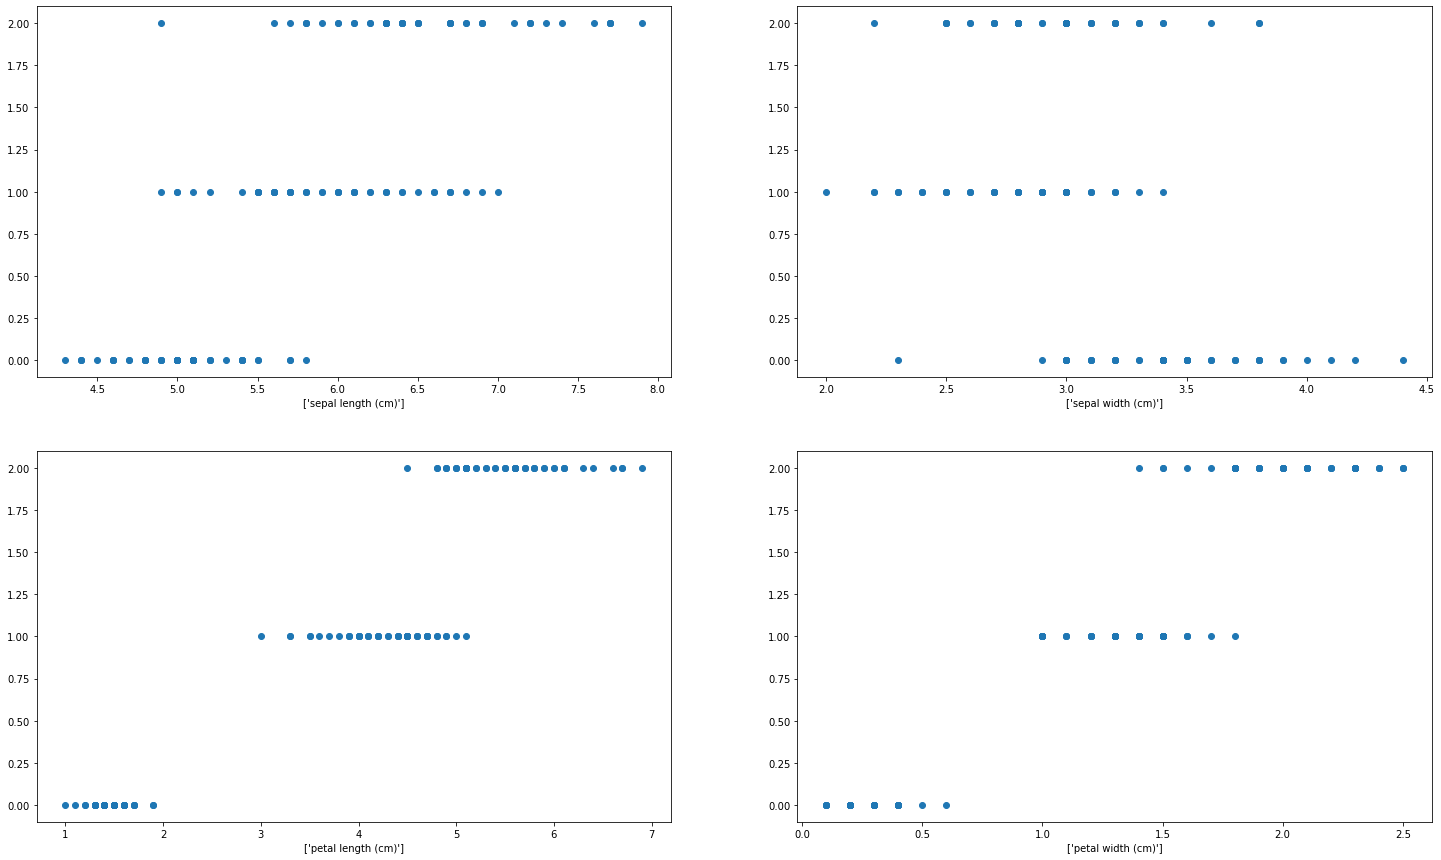

In [27]:
# Plot scatterplot of all the columns to target column

col = iris_data.feature_names

count=1
plt.subplots(figsize=(25, 15))
y1 = iris[['target']]

#print(y1)
for i in range(0,len(col)):
    x1 = iris[[col[i]]]
    plt.subplot(2,2,count)
    plt.scatter(x1,y1)
    plt.xlabel([col[i]])
    #print(x1)
    count+=1

## Check for the Correlation between all the columns.
### Find the most affected columns to target column

In [ ]:
plt.figure(figsize=(15,7))
correlation_matrix = iris.corr().round(2)
#correlation_matrix
sns.heatmap(data=correlation_matrix, annot=True)

### We can see that some features are positively correlated and some are negatively correlated

### We will take all 4 features to predict our data by training the model.

### Now split the dataset into the train and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3)

### Check the shape of our training and testing sets

In [ ]:
X_train.shape

In [ ]:
X_test.shape

### Now load the Logistic Regression from sklearn library

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

### Train our model by fitting our training datasets

In [ ]:
model.fit(X_train,Y_train)

### After our model is trained.. Let's predict the value based on our test set

In [ ]:
Y_predict = model.predict(X_test)

Y_predict

### Compare the above predicted value to the actual value shown below

In [ ]:
Y_test

### Check our model accuracy

In [ ]:
model.score(X_test,Y_test)

### Import confusion matrix from sklearn library and print the matrix comparing the actual and predicted values

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,Y_predict)

print("Confusion Matrix\n\n",matrix)

### Create a visualization of confusion matrix

In [ ]:
labels = list(iris_data.target_names)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot()
mv = ax.matshow(matrix)
plt.title('Confusion matrix Visualization')
fig.colorbar(mv)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

### Check the classification report by importing it from sklearn library

In [ ]:
from sklearn.metrics import classification_report

labels = iris_data.target_names
labels = list(labels)
c_report = classification_report(Y_test,Y_predict,target_names=labels)


print("Classification Report\n\n",c_report)

### We can see that, we are getting every matrix evaluation values almost same..

### Precision, Recall, f1-score are same for all the targeted values..  Accuracy is very reliable.

### Check our matrix accuracy

In [ ]:
from sklearn.metrics import accuracy_score
ascore = accuracy_score(Y_test,Y_predict)

print("Accuracy Score : \n\n",ascore)

### We can say that, our logistic model is very much accurate.. And we can predict values very efficiently based on that

### After putting some random values

In [ ]:
random = model.predict([[10.1,7.5,5.4,2.2]])

random

### We are getting value as '2'. So that means our model predicted it as virginica.